# ASSIGNMENT 2

# Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# PROBLEM 1

# Functions

In [2]:
def create_domain(N = 51):
    x , y = np.mgrid[-4:4:N*1j,-4:4:N*1j]
    z = x + 1j * y
    return z

def get_phi(z, z1 = -1 + 0j, z2 = 1 + 0j , gamma = 1.0, v = 1.0):
    return v*z + gamma*(np.log(z - z1) - np.log(z - z2))/(2*np.pi)

def plot_phi(phi, N = 51):
    x , y = np.mgrid[-4:4:N*1j,-4:4:N*1j]
    plt.subplot(211)
    plt.title("Contours of Streamlines and potential function")
    plt.contour(x, y, phi.real,N)
    plt.ylabel("Potential function")
    plt.subplot(212)
    plt.contour(x, y, phi.imag,N)
    plt.ylabel("Streamlines")
    plt.show()
    

# Results

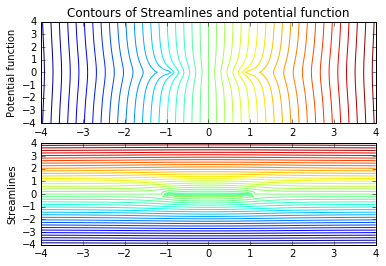

In [3]:
z = create_domain()
phi = get_phi(z)
plot_phi(phi)

# PROBLEM 2

# Functions

In [4]:
def get_velocity(z, gamma = 1.0, z1 = -1.0+0j, z2 = 1.0+0j,v = 1.0+0j ):
    return (v + gamma/(2*np.pi*(z-z1)) - gamma/(2*np.pi*(z-z2))).conjugate()

def euler(tp1, dt=0.1):
    return tp1 + dt * get_velocity(tp1)

def RK2(tp2, dt=0.1):
    return tp2 + 0.5*dt*(get_velocity(tp2) + get_velocity(tp2+ dt*get_velocity(tp2)))

def loop(tp1,tp2,dt=0.1,tf=10.0):
    t = 0.0
    while t < tf:
        tp1 = euler(tp1, dt)
        tp2 = RK2(tp2, dt)
        t+=dt
    return tp1, tp2

def plot(tp1,tp2):
    plt.subplot(211)
    plt.axis([-4.0,10.0,-4.0,4.0])
    plt.plot(tp1.real, tp1.imag, 'bo', label = 'Euler')
    plt.legend(loc='upper left')
    plt.subplot(212)
    plt.axis([-4.0,10.0,-4.0,4.0])
    plt.plot(tp1.real, tp1.imag, 'ro', label = 'RK2')
    plt.legend(loc='upper left')
    plt.show()
    
def trajectory_vortices(tp1, tp2, dt=0.1, tf=10.0):
    t = 0.0
    tp1_all = []
    tp2_all = []
    while t < tf:
        tp1 = euler(tp1, dt)
        tp2 = RK2(tp2, dt)
        tp1_all.append(tp1)
        tp2_all.append(tp2)
        t+=dt
    return tp1_all, tp2_all   

def plot_traj(tp1_all, tp2_all):
    tp1_all = np.asarray(tp1_all)
    tp2_all = np.asarray(tp2_all)
    x1 = tp1_all.real
    y1 = tp1_all.imag
    x2 = tp2_all.real
    y2 = tp2_all.imag
    for i in range(11):
        plt.subplot(211)
        plt.plot(x1[:,i], y1[:,i], label='Euler')
        plt.title('Euler')
        plt.subplot(212)
        plt.plot(x2[:,i], y2[:,i], label='RK2')
        plt.title('RK2')
    plt.show()
    
    
def test_vortex_velocity():
    z1 = complex(2.0, 1)
    z_vor = complex(1., 1.0)
    expect = 1j
    z = np.array([z1,z_vor])
    result = get_velocity(z)
    assert abs(result[1].imag - expect.imag) < 1e-14
    assert abs(result[1].real - expect.real) < 1e-14
    
def create_array(y_min=-2.0, y_max=2.0, x = -2.0,N=11):
    y = np.linspace(y_min, y_max, N)
    tp1 = x + y*1j
    tp2 = x + y*1j
    return tp1, tp2

# Results

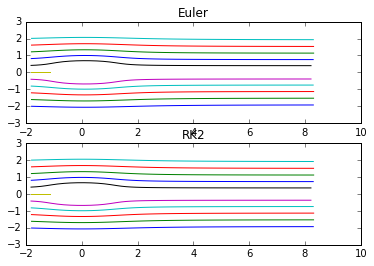

In [5]:
tp1, tp2 = create_array()
tp1_all, tp2_all = trajectory_vortices(tp1,tp2,dt=0.2,tf =10.0)
plot_traj(tp1_all, tp2_all)

The above plots show the trajectory of tracer points using Euler and RK2 method.

# Initial Condition

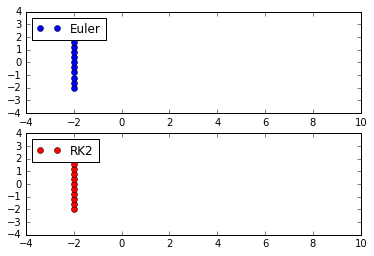

In [6]:
tp1, tp2 = create_array()
plot(tp1,tp2)

# After t = 2s

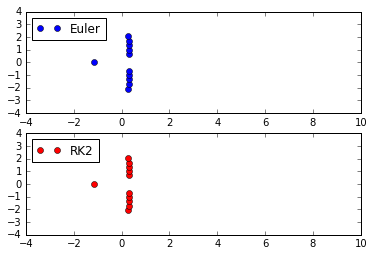

In [7]:
tp1, tp2 = create_array()
tp1, tp2 = loop(tp1,tp2,dt=0.2,tf=2.0)
plot(tp1,tp2)

# After t = 5s

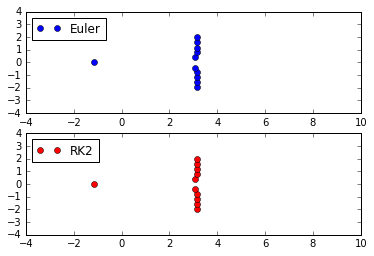

In [8]:
tp1, tp2 = create_array()
tp1, tp2 = loop(tp1,tp2,dt=0.2,tf=5.0)
plot(tp1,tp2)

# After t = 10s

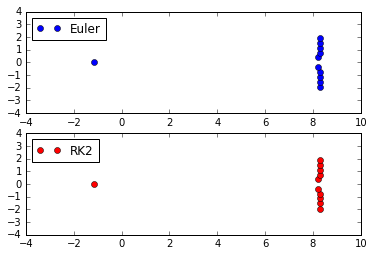

In [9]:
tp1, tp2 = create_array()
tp1, tp2 = loop(tp1,tp2,dt=0.2,tf=10.0)
plot(tp1,tp2)

# PROBLEM 3

# Functions

In [10]:
def get_velocity(z, gamma = 2*np.pi):
    vel = []
    for i in z:
        v=0
        for j in z:
            if i!=j:
                v+=gamma/(2*np.pi*(j-i))
        vel.append(1j*np.conj(v))    
    return np.array(vel)


def Euler(tp1,dt):
    return tp1 + dt * get_velocity(tp1)

def RK2(tp2,dt):
    return tp2 + 0.5*dt*(get_velocity(tp2) + get_velocity(tp2+dt * get_velocity(tp2)))

def Exact(t, z1 = -0.5 + 0j, z2 = 0.5 + 0j, gamma = 2*np.pi):
	omega = gamma/(np.pi*(z1-z2)*(z1-z2))
	theta1 = np.arctan(z1.imag/z1.real) + np.pi
	theta2 = np.arctan(z2.imag/z2.real)
	v1=(gamma*abs(z1-z2)/(4*np.pi))*(np.cos(omega*t+theta1)+1j*np.sin(theta1-omega*t))
	v2=(gamma*abs(z1-z2)/(4*np.pi))*(np.cos(omega*t+theta2)+1j*np.sin(theta2-omega*t))
	return np.array([v1,v2])

def trajectory(z1 = -0.5 + 0j, z2 = 0.5 + 0j,dt=0.2, tf=10.0):
    t = 0.0
    euler = np.array([z1,z2])
    rk2 = np.array([z1,z2])
    exact = np.array([z1,z2])
    Error_euler=[]
    Error_RK2=[]
    while t < tf:
        euler = Euler(euler,dt)
        rk2 = RK2(rk2,dt)
        exact = Exact(t)
        Error_euler.append((sum(abs(exact-euler))))
        Error_RK2.append((sum(abs(exact-rk2))))
        plt.subplot(311)
        plt.plot(euler.real, euler.imag,'bo', label = 'Euler')
        plt.subplot(312)
        plt.plot(rk2.real,rk2.imag,'ro', label = 'RK2')
        plt.subplot(313)
        plt.plot(exact.real,exact.imag,'ko', label = 'Exact')
        plt.pause(0.1)
        t += dt 
    plt.show()
    return Error_RK2, Error_euler
    

def plot_trajectory(z1 = -0.5 + 0j, z2 = 0.5 + 0j,dt=0.2, tf=10.0):
    euler = np.array([z1,z2])
    rk2 = np.array([z1,z2])
    exact = np.array([z1,z2])
    a, b = trajectory()
    plotaxis = np.linspace(0.,10.0, len(a))
    plt.subplot(211)
    plt.plot(plotaxis,b,label='Euler')
    plt.legend(loc='upper left')
    plt.xlabel('t')
    plt.ylabel('Error')
    plt.subplot(212)
    plt.plot(plotaxis,a, label = 'RK2')
    plt.legend(loc='upper left')
    plt.xlabel('t')
    plt.ylabel('Error')
    plt.show()

# RESULTS

# Trajectory

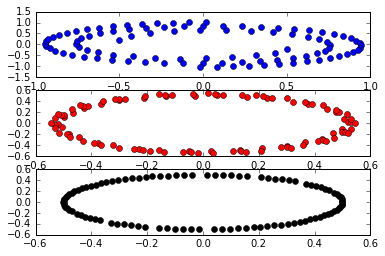

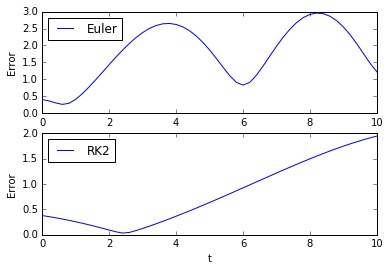

In [11]:
plot_trajectory(z1 = -0.5 + 0j, z2 = 0.5 + 0j,dt=0.2, tf=10.0)

The first plot above shows the trajectory of the particles in three 
different cases namely Euler-integrated, RK2-integrated and the exact one.
The below plot shows the error vs time for euler and RK2 methods. Here
error is the error obtained at all the times simulated. 

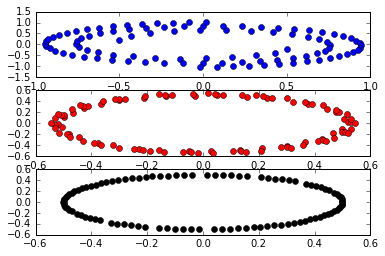

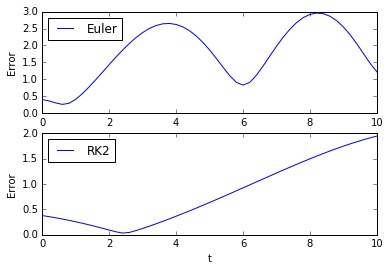

In [12]:
plot_trajectory(z1 = -0.5 + 0j, z2 = 0.5 + 0j,dt=0.1, tf=10.0)

# Error Analysis

Here, lets look at the convergence study for the two integrators used
namely Euler and Runge-Kutta(2nd order). We plot the error 
(difference between exact and euler solution) for all times within 
10s. Let's see how this error varies as the time progresses.

In [13]:
def loop2(z1 = -0.5 + 0j, z2 = 0.5 + 0j,dt=0.2, tf=10.0):
    t = 0.0
    d1 = []
    d2 = []
    euler = np.array([z1,z2])
    rk2 = np.array([z1,z2])
    exact = np.array([z1,z2])
    while t < tf:
        euler = Euler(euler,dt)
        rk2 = RK2(rk2,dt)
        exact = Exact(t)
        d1.append(sum(abs(exact-euler)))
        d2.append((sum(abs(exact-rk2))))
        t += dt
    return (abs(exact[0]-euler[0])), (abs(exact[0]-rk2[0])), sum(d1)*dt/tf, sum(d2)*dt/tf

timesteps = [0.001, 0.01, 0.1, 0.5, 1]
#timesteps = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35]

def convergence(timesteps,z1 = -0.5 + 0j, z2 = 0.5 + 0j, tf=10.0):
    Error_RK2 = []
    Error_euler = []
    Error_all_RK2 = []
    Error_all_euler = []
    euler = np.array([z1,z2])
    rk2 = np.array([z1,z2])
    exact = np.array([z1,z2])
    for i in timesteps:
        a,b,c,d = loop2(z1 = -0.5 + 0j, z2 = 0.5 + 0j,dt =i, tf=10.0)
        Error_RK2.append(b)
        Error_euler.append(a)
        Error_all_RK2.append(d)
        Error_all_euler.append(c)
    return Error_RK2, Error_euler, Error_all_RK2, Error_all_euler

def plot3(timesteps):
    plt.subplot(111)
    plt.loglog(timesteps,a,label='RK2')
    plt.loglog(timesteps,b,label='Euler')
    plt.legend()
    plt.title('Error at the end of 10s')
    plt.xlabel('dt')
    plt.ylabel('Error')
    plt.show()
    plt.subplot(111)
    plt.loglog(timesteps,c,label='RK2')
    plt.loglog(timesteps,d,label='Euler')
    plt.legend()
    plt.title('Sum of errors for a given timestep')
    plt.xlabel('dt')
    plt.ylabel('Error')
    plt.show()


# Results

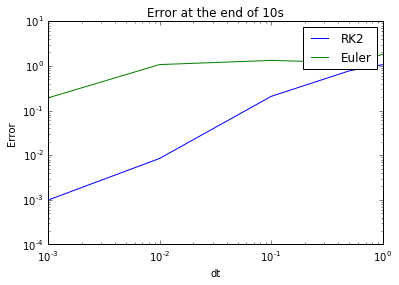

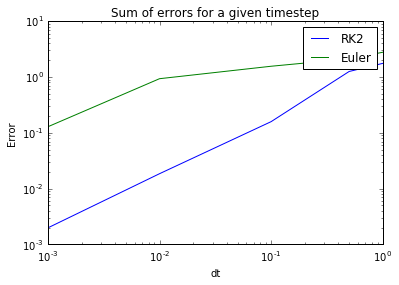

In [14]:
a,b,c,d = convergence(timesteps)
plot3(timesteps)

We can see that from the above plots, the error vs timestep for Runge-Kutta method is more steeper than the euler one.
The plots are drawn in log-log scale so that we can see that the RK2 method is of second order convergence.